In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Admission_Prediction.xlsx')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


# Domain Analysis

# Basic Checks
* Head()--function
* tail()--fuction
* info()--function
* describe()--funtion

In [4]:
data.head()#Nature of columns , Do we any unwanted(?,*,&) datapoint , first five rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.tail()# last five rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [6]:
data.info()#Null count and data type of each and every column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.describe()# basic checks 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data.shape# number of rows and number of columns

(500, 9)

In [9]:
data.rename(columns={'GRE Score':'gre','TOEFL Score':'t_score','University Rating':'uni_r','Chance of Admit':'coa'},inplace=True)

In [10]:
data.head()

,Serial No.,gre,t_score,uni_r,SOP,LOR,CGPA,Research,coa
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
data.drop('Serial No.',axis=1,inplace=True)

## Exploratory Data Analysis

# Univariant Analysis

### Analysis of Continous Variable

In [12]:
data

,gre,t_score,uni_r,SOP,LOR,CGPA,Research,coa
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [13]:
box=data[['gre','t_score','CGPA']]

In [14]:
box

,gre,t_score,CGPA
0,337.0,118.0,9.65
1,324.0,107.0,8.87
2,NaN,104.0,8.00
3,322.0,110.0,8.67
4,314.0,103.0,8.21
...,...,...,...
495,332.0,108.0,9.02
496,337.0,117.0,9.87
497,330.0,120.0,9.56
498,312.0,103.0,8.43


#### Distribution of variable

C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

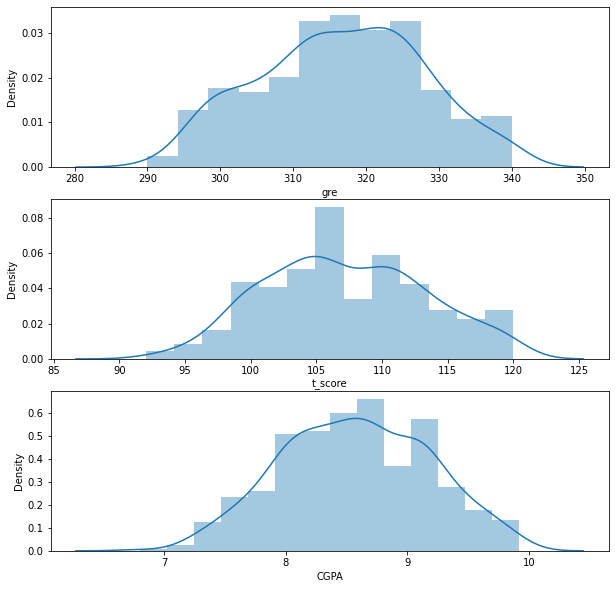

In [15]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(3,1,plotnumber)
    sns.distplot(data[c])
    plotnumber=plotnumber + 1 
plt.show()    
    

### Insights from the data
* Maximum student got marks between 310 to 318 range and Gre_ score is not a normally distributed column
* Maximum student got marks between 105 to 107 range and toefl score is not a not   normally distributed column


In [17]:
Task ---> write same for loop for descrete variable and take out the insights 


SyntaxError: invalid syntax (<ipython-input-17-f98345d8b34b>, line 1)

### Bivariant Analysis

In [18]:
box

,gre,t_score,CGPA
0,337.0,118.0,9.65
1,324.0,107.0,8.87
2,NaN,104.0,8.00
3,322.0,110.0,8.67
4,314.0,103.0,8.21
...,...,...,...
495,332.0,108.0,9.02
496,337.0,117.0,9.87
497,330.0,120.0,9.56
498,312.0,103.0,8.43


#### Bivariant Analysis for continious variable

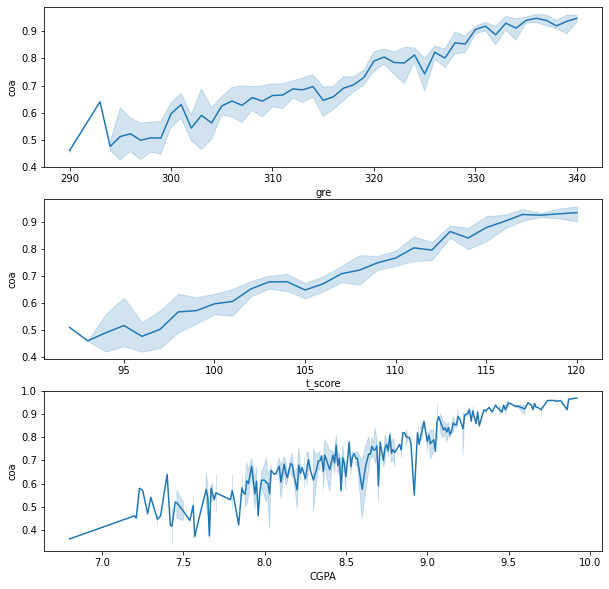

In [19]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(3,1,plotnumber)
    sns.lineplot(x=data[c],y=data.coa)
    plotnumber=plotnumber+1
plt.show()    

### Insights from above graph
* gre_score and coa follow  increasing trend , higher the gre_score higher the chance of admission
* Tofel and coa follow increasing trend,higher the toefl socre then higher the  chance of admission

#### Bivariant Analysis for categorical variable 

In [20]:
data.columns

Index(['gre', 't_score', 'uni_r', 'SOP', 'LOR', 'CGPA', 'Research', 'coa'], dtype='object')

In [21]:
box1=data[['uni_r','SOP','LOR','Research']]

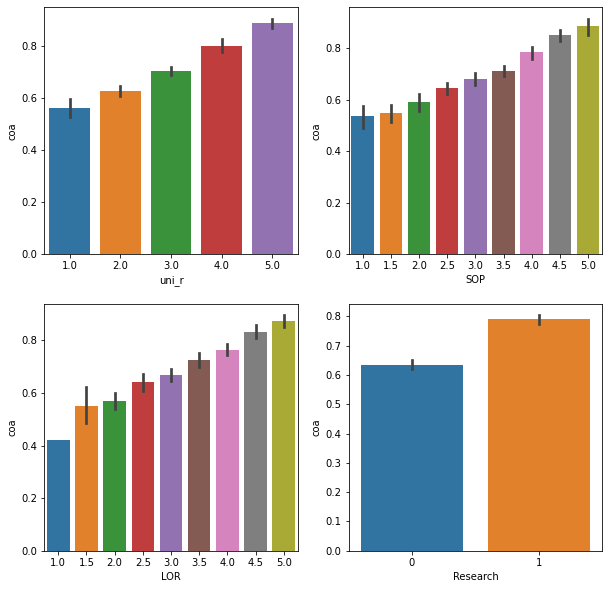

In [22]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for c in box1:
    ax=plt.subplot(2,2,plotnumber)
    sns.barplot(x=data[c],y=data.coa)
    plotnumber+=1
plt.show()    

#### Insights for Bivariant analysis(descerete variable)
* There is upward trend between university rating and coa ,higher the rating higher the chance of admission
* same trend with SOP also
* LOR also same trend 
* The student who are doing research have high chance of admission 

### Data preprocessing

In [23]:
data.isnull().sum()

gre         15
t_score     10
uni_r       15
SOP          0
LOR          0
CGPA         0
Research     0
coa          0
dtype: int64

In [ ]:
#whenever you handle the null value for continious columns always c check for distribution 

### GRE_score

C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


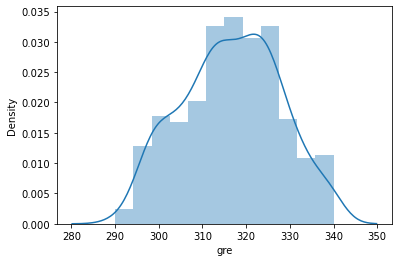

In [24]:
sns.distplot(data.gre)

In [27]:
data.gre.isnull()

0      False
1      False
2       True
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: gre, Length: 500, dtype: bool

In [35]:
print('median of column GRE_score using numpy package==> ',np.median(data.gre))
print('median of column GRE_score using pandas==>',pd.DataFrame.median(data.gre))

median of column GRE_sore using numpy package==>  nan
median of column GRE_score using pandas==> 317.0


In [37]:
data.loc[data['gre'].isnull()==True,'gre']=pd.DataFrame.median(data.gre)

In [39]:
data.loc[data['gre'].isnull()==True]

Series([], Name: gre, dtype: float64)

### toefl score

C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


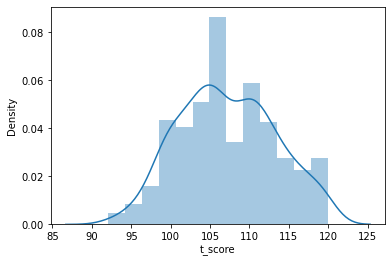

In [41]:
sns.distplot(data.t_score)

In [42]:
print('median of column t_score using numpy package==> ',np.median(data.t_score))
print('median of column t_score using pandas==>',pd.DataFrame.median(data.t_score))

median of column t_score using numpy package==>  nan
median of column t_score using pandas==> 107.0


In [44]:
data.loc[data['t_score'].isnull()==True,'t_score']=107.0 #handling the NaN values

In [45]:
data.loc[data['t_score'].isnull()==True,'t_score']

Series([], Name: t_score, dtype: float64)

# Task
handle the null value for university rating 

C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit Atram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


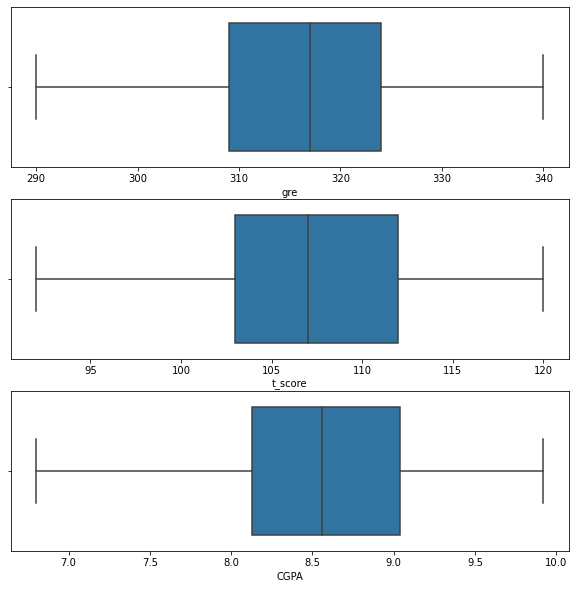

In [70]:
# we do not have outlier in the data 
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(3,1,plotnumber)
    sns.boxplot(data[c])
    plotnumber=plotnumber + 1 
plt.show()    

# Feature Selection --> selection of columns

In [50]:
data.drop('coa',axis=1)

,gre,t_score,uni_r,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


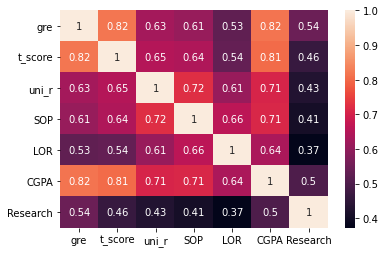

In [52]:
sns.heatmap(data.drop('coa',axis=1).corr(),annot=True)
plt.show()

In [53]:
data.describe() #check constant columns

,gre,t_score,uni_r,SOP,LOR,CGPA,Research,coa
count,500.000000,500.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.572000,107.184000,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.104207,6.051395,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# you have to check std,and if you find any column with std=0 then you have to drop that column 

# Model Building 

In [80]:
#creation of independent and dependent column 
X=data.iloc[:,0:-1]#independent columns
y=data.coa#dependent column

In [57]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: coa, Length: 500, dtype: float64

In [73]:
data.loc[data['uni_r'].isnull()==True,'uni_r']=pd.DataFrame.median(data.uni_r)

In [74]:
data.isnull().sum()


gre         0
t_score     0
uni_r       0
SOP         0
LOR         0
CGPA        0
Research    0
coa         0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    float64
 1   t_score   500 non-null    float64
 2   uni_r     485 non-null    float64
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   CGPA      500 non-null    float64
 6   Research  500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


In [82]:
lr.fit(X_train,y_train)

LinearRegression()

In [84]:
y_train_predict=lr.predict(X_train)

In [83]:
from sklearn.metrics import r2_score

In [85]:
accuracy_train=r2_score(y_train,y_train_predict)
accuracy_train

0.8204930894286098

## Testing

In [86]:
y_hat=lr.predict(X_test)

In [87]:
accuracy_test=r2_score(y_test,y_hat)
accuracy_test

0.8176492199521557

In [88]:
X_test.shape

(125, 7)

### Adjusted R2 score for testing

In [89]:
adjusted_r2_score=1-(1-0.81)*(125-1)/(125-7-1)

In [90]:
adjusted_r2_score

0.7986324786324787